In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving titanic_train.csv to titanic_train.csv


In [ ]:
df=pd.read_csv('titanic_train.csv')
print(df.head())

   PassengerId  Survived  Pclass  ...     Fare Cabin  Embarked
0            1         0       3  ...   7.2500   NaN         S
1            2         1       1  ...  71.2833   C85         C
2            3         1       3  ...   7.9250   NaN         S
3            4         1       1  ...  53.1000  C123         S
4            5         0       3  ...   8.0500   NaN         S

[5 rows x 12 columns]


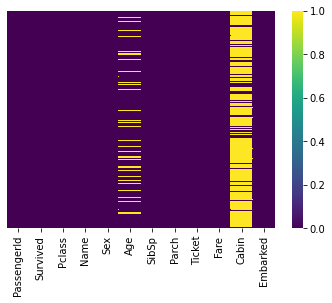

In [ ]:
sns.heatmap(df.isnull(),yticklabels=False,cmap='viridis',cbar=True)

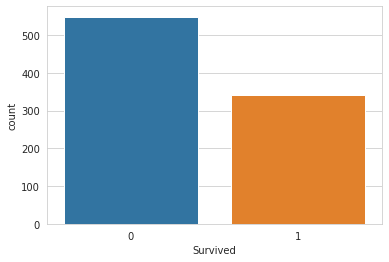

In [ ]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',data=df)

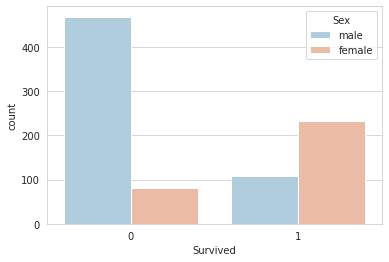

In [ ]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Sex',data=df,palette='RdBu_r')

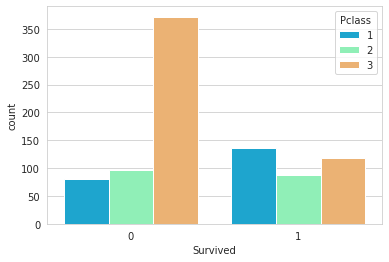

In [ ]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Pclass',data=df,palette='rainbow')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


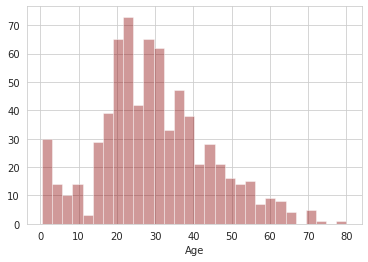

In [ ]:
sns.distplot(df['Age'].dropna(),kde=False,bins=30,color='darkred')

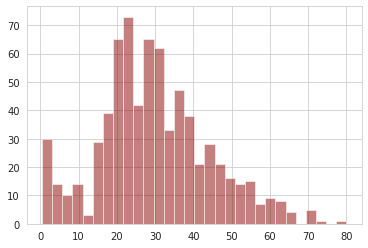

In [ ]:
df['Age'].dropna().hist(bins=30,color='darkred',alpha=0.5)

In [ ]:
df.drop('Cabin',inplace=True,axis=1)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [ ]:
mean_by_pclass = df.groupby('Pclass')['Age'].mean()
print(mean_by_pclass)
mean_by_pclass.index_col=['passenger class']
print(mean_by_pclass.head())
print('*'*10)
#test_mean=df.groupby(by='Sex')['Age'].mean()
#print(test_mean)
#print(test_mean['female'])



Pclass
1    38.233441
2    29.877630
3    25.140620
Name: Age, dtype: float64
Pclass
1    38.233441
2    29.877630
3    25.140620
Name: Age, dtype: float64
**********


In [ ]:
df.nunique() #to get number of unique values of a column

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Embarked         3
dtype: int64

In [ ]:
#df[df['Age'].isna()]
print(df.loc[(df['Pclass'] ==3) & (df['Age'].isnull())]['Age'])
print('*'*50)
df.loc[(df['Pclass'] ==3) & (df['Age'].isnull()),'Age'] = mean_by_pclass[3]
df.loc[(df['Pclass'] ==2) & (df['Age'].isnull()),'Age'] = mean_by_pclass[2]
df.loc[(df['Pclass'] ==1) & (df['Age'].isnull()),'Age'] = mean_by_pclass[1]
df[df['Age'].isna()]

5     NaN
19    NaN
26    NaN
28    NaN
29    NaN
       ..
859   NaN
863   NaN
868   NaN
878   NaN
888   NaN
Name: Age, Length: 136, dtype: float64
**************************************************


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked


In [ ]:
print(df['Age'].value_counts())
df.isnull().sum()

25.140620    136
38.233441     30
24.000000     30
22.000000     27
18.000000     26
            ... 
53.000000      1
66.000000      1
70.500000      1
20.500000      1
0.420000       1
Name: Age, Length: 91, dtype: int64


PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

In [ ]:
print(df.loc[df['Embarked'].isnull()])
print(df.Embarked.unique())
df.loc[df['Embarked'].isnull(),'Embarked']='N'
print('------------After removing null ------------')
print(df.loc[df['Embarked'].isnull()])
print('--'*20)
print(df.Embarked.unique())

Empty DataFrame
Columns: [PassengerId, Survived, Pclass, Name, Sex, Age, SibSp, Parch, Ticket, Fare, Embarked]
Index: []
['S' 'C' 'Q' 'N']
------------After removing null ------------
Empty DataFrame
Columns: [PassengerId, Survived, Pclass, Name, Sex, Age, SibSp, Parch, Ticket, Fare, Embarked]
Index: []
----------------------------------------
['S' 'C' 'Q' 'N']
